<a href="https://colab.research.google.com/github/markustoivonen/AIHealthTech2020/blob/master/exercises/ex5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Model


In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

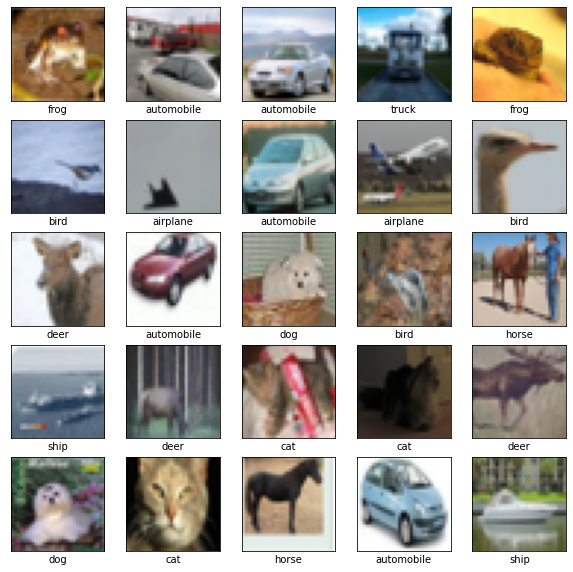

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[-i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[-i][0]])
plt.show()


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  #layers.experimental.preprocessing.RandomRotation(0.2),
])

model2 = models.Sequential()
model2.add(data_augmentation)
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10))

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

history2 = model2.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.5182 - accuracy: 0.4465 - val_loss: 1.2445 - val_accuracy: 0.5510
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1386 - accuracy: 0.5987 - val_loss: 1.0917 - val_accuracy: 0.6182
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9862 - accuracy: 0.6514 - val_loss: 0.9622 - val_accuracy: 0.6660
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8857 - accuracy: 0.6904 - val_loss: 0.9196 - val_accuracy: 0.6812
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8150 - accuracy: 0.7148 - val_loss: 0.8877 - val_accuracy: 0.6932
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7517 - accuracy: 0.7387 - val_loss: 0.8844 - val_accuracy: 0.7006
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7039 - accuracy: 0.7556 - val_loss: 0.8813 -

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print(test_acc)


plt.plot(history2.history['accuracy'], label='accuracy_augmentation')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy_augmentation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss2, test_acc2 = model2.evaluate(x_test,  y_test, verbose=2)

print(test_acc2)

In [ ]:
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = model2.layers[1].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
	
# plot first few filters
n_filters, ix = 1, 1
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
for j in range(3):
  # specify subplot and turn of axis
  ax = plt.subplot(n_filters, 3, ix)
  ax.set_xticks([])
  ax.set_yticks([])
  # plot filter channel in grayscale
  plt.imshow(f[:, :, j], cmap='gray')
  ix += 1
# show the figure
plt.show()

In [ ]:
 
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(x_test[800], cmap=plt.cm.binary)
# The CIFAR labels happen to be arrays, 
# which is why you need the extra index
plt.xlabel(class_names[y_test[800][0]])
plt.show()
 
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
square = 1
ix = 1
img = np.expand_dims((x_test[800]), axis=0)
img = tf.keras.applications.vgg16.preprocess_input(img)
feature_maps = model.predict(img)
# specify subplot and turn of axis
ax = plt.subplot(square, square, 1)
ax.set_xticks([])
ax.set_yticks([])
# plot filter channel in grayscale
plt.imshow(feature_maps[0, :, :, 0], cmap='gray')
# show the figure
plt.show()